# H.w 8

Hadar Mentel 205642366 
Linoy Halifa 201052198
Noam Arian 311271829

## Question 8

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Load the dataset
file_path = 'Carseats.csv' 
data = pd.read_csv(file_path)

# Convert categorical variables to numerical 
data = pd.get_dummies(data, columns=['ShelveLoc', 'Urban', 'US'], drop_first=True)

# Split data into predictors (X) and response (y)
X = data.drop('Sales', axis=1)  # All columns except 'Sales'
y = data['Sales']  # Response variable

# Split into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")




Training set size: 280 samples
Test set size: 120 samples


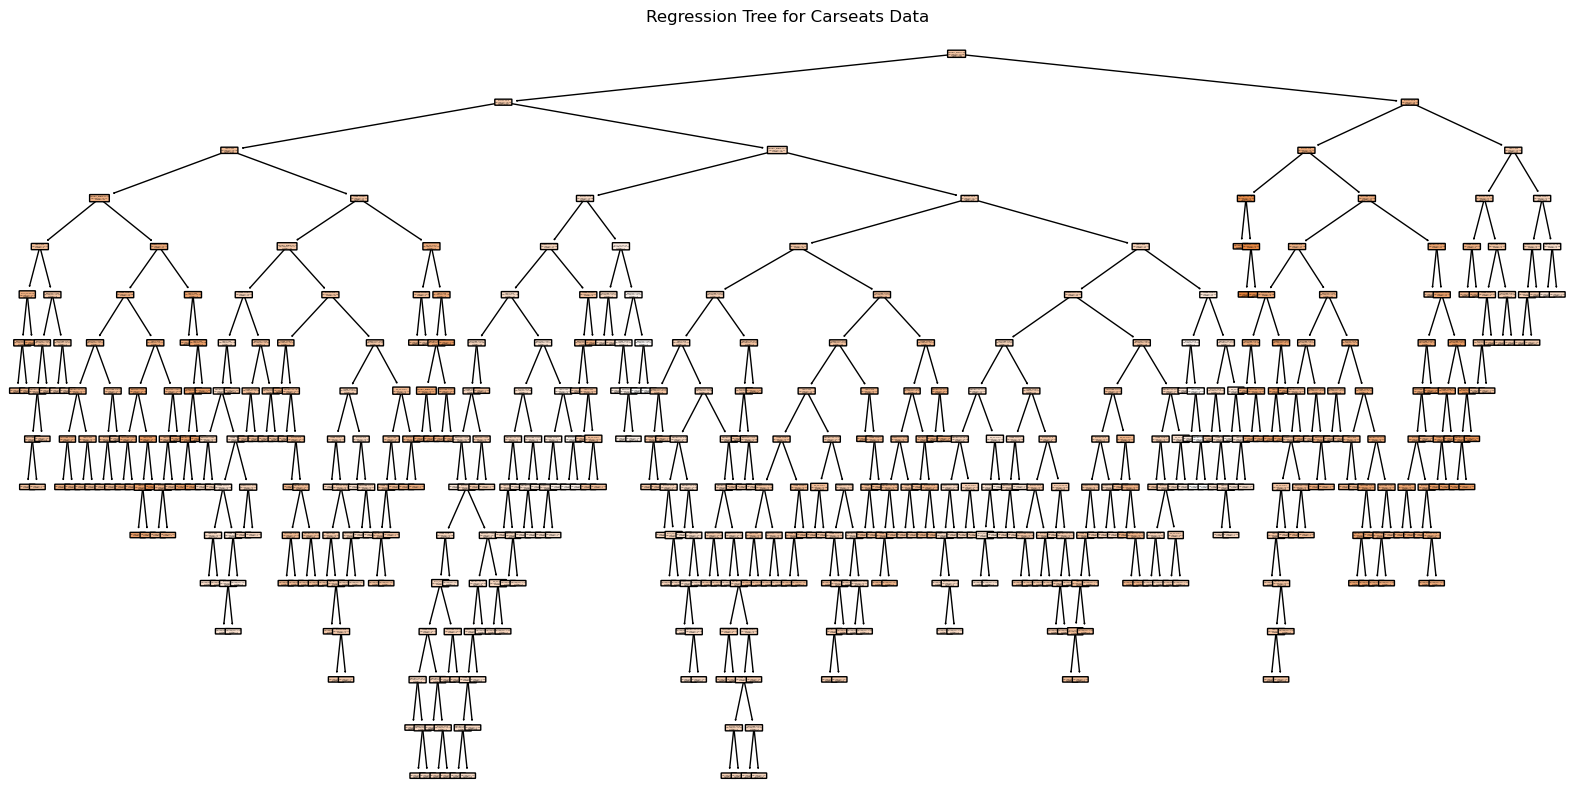

Test Mean Squared Error (MSE): 5.2917466666666675


In [3]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Fit a regression tree to the training set
reg_tree = DecisionTreeRegressor(random_state=117)
reg_tree.fit(X_train, y_train)

# Plot the regression tree
plt.figure(figsize=(20, 10))
plot_tree(reg_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title("Regression Tree for Carseats Data")
plt.show()

# Predict on the test set
y_pred = reg_tree.predict(X_test)

# Calculate the test MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Test Mean Squared Error (MSE): {mse}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Optimal max_depth: 3


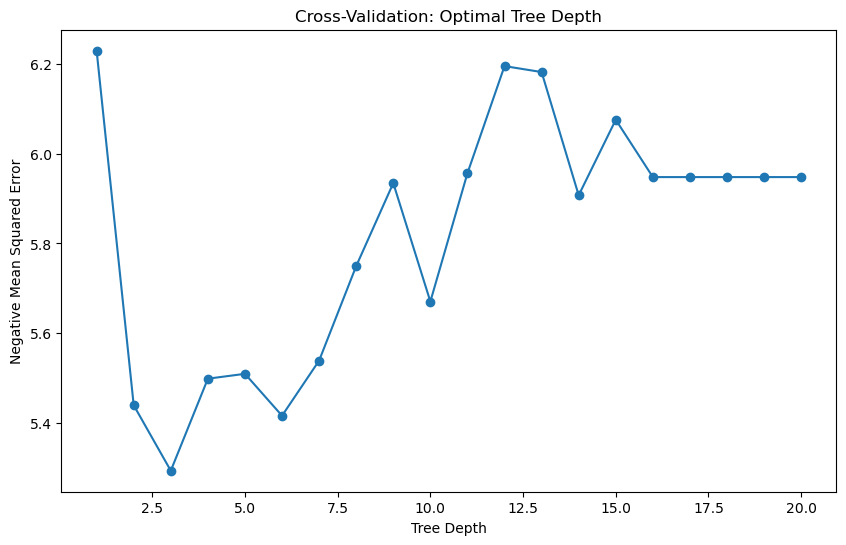

Test MSE for pruned tree: 4.806952738698438
Test MSE for unpruned tree: 5.2917466666666675


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Define a DecisionTreeRegressor model
tree_model = DecisionTreeRegressor(random_state=117)

# Define the hyperparameter grid for tree depth
param_grid = {'max_depth': range(1, 21)}  # Test tree depths from 1 to 20

# Perform cross-validation using GridSearchCV
grid_search = GridSearchCV(estimator=tree_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Extract the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"Optimal max_depth: {best_params['max_depth']}")

# Plot cross-validation results
cv_results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], -cv_results['mean_test_score'], marker='o')
plt.title("Cross-Validation: Optimal Tree Depth")
plt.xlabel("Tree Depth")
plt.ylabel("Negative Mean Squared Error")
plt.show()

# Test the pruned (optimal) tree
y_pred_pruned = best_model.predict(X_test)
mse_pruned = mean_squared_error(y_test, y_pred_pruned)
print(f"Test MSE for pruned tree: {mse_pruned}")

# Compare with the unpruned tree
y_pred_unpruned = reg_tree.predict(X_test)
mse_unpruned = mean_squared_error(y_test, y_pred_unpruned)
print(f"Test MSE for unpruned tree: {mse_unpruned}")

Test MSE with Bagging: 2.5982696155000005
Feature Importances (Bagging):
Price               0.335248
ShelveLoc_Good      0.190419
Age                 0.115359
CompPrice           0.101155
Advertising         0.075895
Income              0.050480
ShelveLoc_Medium    0.047581
Population          0.037464
Education           0.031998
Urban_Yes           0.008147
US_Yes              0.006252
dtype: float64


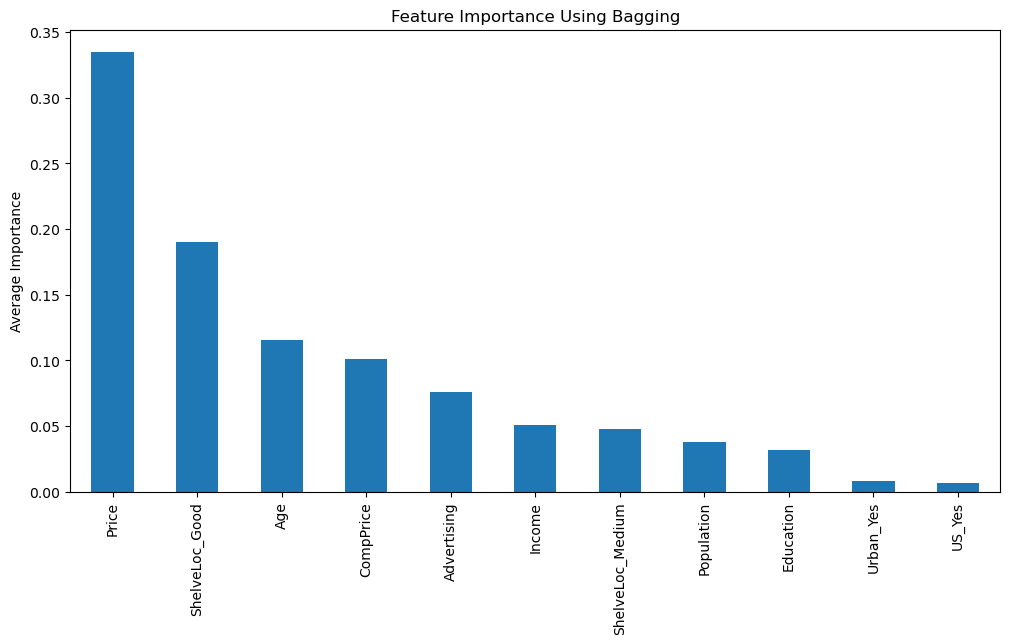

In [11]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Initialize the bagging regressor
bagging_model = BaggingRegressor(
    estimator=DecisionTreeRegressor(random_state=117), 
    n_estimators=100,  # Number of trees
    random_state=117
)

# Fit the model to the training data
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging_model.predict(X_test)

# Calculate the test MSE
mse_bagging = mean_squared_error(y_test, y_pred_bagging)
print(f"Test MSE with Bagging: {mse_bagging}")

# Feature importance: Mean of feature importance across all trees
feature_importances = [
    tree.feature_importances_ for tree in bagging_model.estimators_
]
average_importance = pd.Series(
    sum(feature_importances) / len(feature_importances), index=X.columns
)

# Sort feature importances in descending order
average_importance = average_importance.sort_values(ascending=False)
print("Feature Importances (Bagging):")
print(average_importance)

# Plot feature importance
plt.figure(figsize=(12, 6))
average_importance.plot(kind='bar')
plt.title("Feature Importance Using Bagging")
plt.ylabel("Average Importance")
plt.show()



Test MSE with Random Forest: 3.247082687666667
Feature Importances (Random Forest):
Price               0.257480
ShelveLoc_Good      0.148520
Age                 0.137803
CompPrice           0.097205
Advertising         0.092505
Income              0.077627
Population          0.075032
Education           0.052379
ShelveLoc_Medium    0.035102
Urban_Yes           0.013185
US_Yes              0.013162
dtype: float64


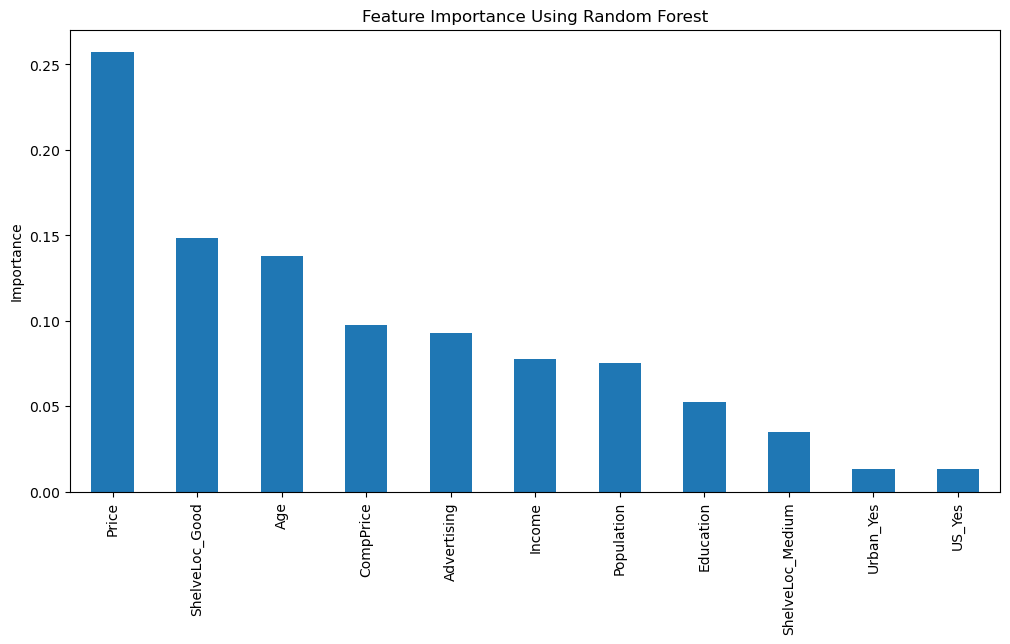

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Initialize the random forest regressor
rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees
    random_state=117,
    max_features='sqrt'  # Valid value: 'sqrt' for regression
)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate the test MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Test MSE with Random Forest: {mse_rf}")

# Feature Importance
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances_rf = feature_importances_rf.sort_values(ascending=False)
print("Feature Importances (Random Forest):")
print(feature_importances_rf)

# Plot Feature Importance
plt.figure(figsize=(12, 6))
feature_importances_rf.plot(kind='bar')
plt.title("Feature Importance Using Random Forest")
plt.ylabel("Importance")
plt.show()


max_features = sqrt: Test MSE = 3.247082687666667
max_features = log2: Test MSE = 3.247082687666667
max_features = None: Test MSE = 2.5565896912499997


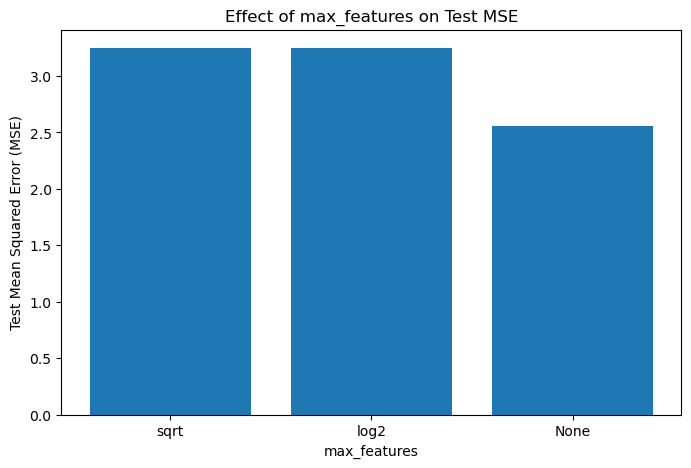

In [23]:
# Experiment with different values of max_features
results = {}
for m in ['sqrt', 'log2', None]:  # Test sqrt, log2, and None (default: all features)
    rf_model = RandomForestRegressor(
        n_estimators=100,
        random_state=117,
        max_features=m
    )
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_rf)
    results[m] = mse

# Print results for different max_features values
for max_feature, mse in results.items():
    print(f"max_features = {max_feature}: Test MSE = {mse}")


# Convert the keys of the results dictionary to strings
results_str_keys = {str(k): v for k, v in results.items()}

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(results_str_keys.keys(), results_str_keys.values())
plt.xlabel("max_features")
plt.ylabel("Test Mean Squared Error (MSE)")
plt.title("Effect of max_features on Test MSE")
plt.show()


## question 9

In [8]:
file_path = "OJ.csv"
data = pd.read_csv(file_path, na_values='?')
OJ = data.dropna()


In [10]:
#(a)

# Set seed for reproducibility
np.random.seed(123)

# Split the dataset: 800 samples for training, the rest for testing
train_set, test_set = train_test_split(OJ, train_size=800, random_state=123)
# Display dataset sizes
print("Training set size:", train_set.shape[0])
print("Test set size:", test_set.shape[0])

Training set size: 800
Test set size: 270


In [18]:
#(b)

from sklearn.preprocessing import LabelEncoder

# Convert categorical target variable to numeric
label_encoder = LabelEncoder()
train_set['Purchase'] = label_encoder.fit_transform(train_set['Purchase'])

# Convert all categorical features to numeric
X_train = train_set.drop(columns=['Purchase'])
y_train = train_set['Purchase']

# Convert all categorical columns to numeric using LabelEncoder
for col in X_train.select_dtypes(include=['object']).columns:
    X_train[col] = LabelEncoder().fit_transform(X_train[col])

# Train decision tree classifier
tree_model = DecisionTreeClassifier(random_state=123)
tree_model.fit(X_train, y_train)

# Predict on training data
y_train_pred = tree_model.predict(X_train)

# Compute training error rate
train_accuracy = accuracy_score(y_train, y_train_pred)
train_error_rate = 1 - train_accuracy

# Display the training error rate
print(f"Training Error Rate: {train_error_rate:.4f}")

Training Error Rate: 0.0125


Number of features in X_train: 11
Number of features in tree: 17


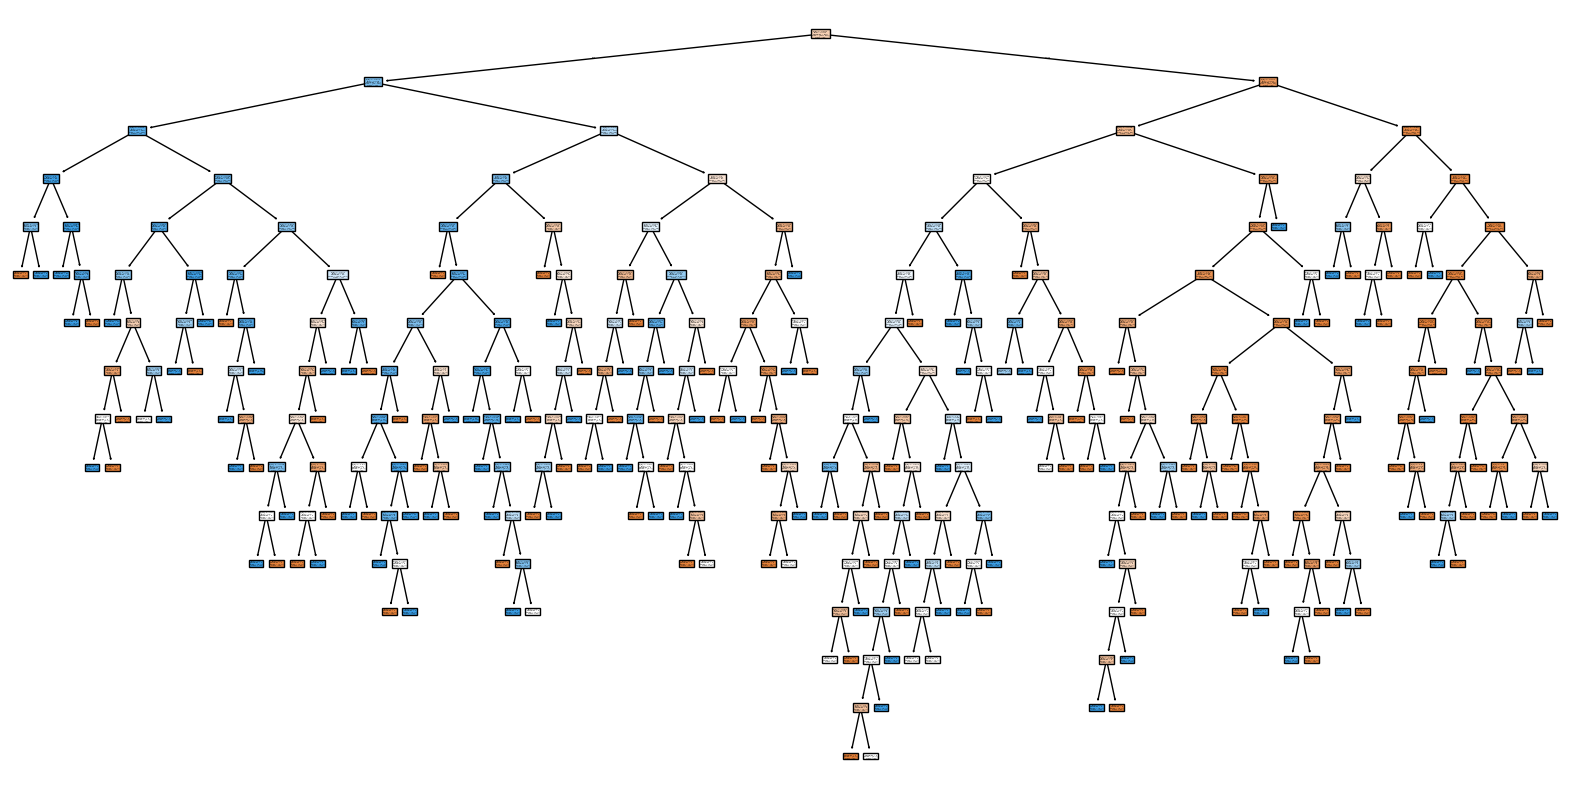

Number of terminal nodes (leaf nodes): 174


In [23]:
# (c)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Print number of features in model vs. dataset
print(f"Number of features in X_train: {len(X_train.columns)}")
print(f"Number of features in tree: {tree_model.n_features_in_}")

# Ensure feature names are correctly formatted and match the model's input features
if len(X_train.columns) == tree_model.n_features_in_:
    feature_names = list(map(str, X_train.columns))  # Convert feature names to strings
else:
    print("Warning: Feature mismatch detected!")
    feature_names = None  # Avoid using incorrect feature names

# Plot the decision tree
plt.figure(figsize=(20, 10))  # Set figure size for readability
plot_tree(tree_model, feature_names=feature_names, class_names=['No', 'Yes'], filled=True)
plt.show()

# Count the number of terminal nodes (leaf nodes)
n_leaves = tree_model.get_n_leaves()
print(f"Number of terminal nodes (leaf nodes): {n_leaves}")


In [25]:
#(d)

from sklearn.tree import export_text

# Print the number of features in X_train vs. the model
print(f"Number of features in X_train: {len(X_train.columns)}")
print(f"Number of features used in tree: {tree_model.n_features_in_}")

# Ensure the correct number of feature names
if len(X_train.columns) == tree_model.n_features_in_:
    feature_names = list(map(str, X_train.columns))
else:
    print("Warning: Feature mismatch detected! Using default feature names.")
    feature_names = [f"Feature {i}" for i in range(tree_model.n_features_in_)]

# Generate a textual summary of the decision tree
tree_summary = export_text(tree_model, feature_names=feature_names)

# Print the full tree summary
print(tree_summary)


Number of features in X_train: 11
Number of features used in tree: 17
|--- Feature 8 <= 0.48
|   |--- Feature 8 <= 0.28
|   |   |--- Feature 8 <= 0.06
|   |   |   |--- Feature 1 <= 1.50
|   |   |   |   |--- Feature 15 <= 0.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Feature 15 >  0.15
|   |   |   |   |   |--- class: 1
|   |   |   |--- Feature 1 >  1.50
|   |   |   |   |--- Feature 0 <= 268.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Feature 0 >  268.50
|   |   |   |   |   |--- Feature 9 <= 2.15
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Feature 9 >  2.15
|   |   |   |   |   |   |--- class: 0
|   |   |--- Feature 8 >  0.06
|   |   |   |--- Feature 11 <= 0.22
|   |   |   |   |--- Feature 0 <= 235.50
|   |   |   |   |   |--- Feature 12 <= 0.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- Feature 12 >  0.50
|   |   |   |   |   |   |--- Feature 6 <= 0.50
|   |   |   |   |   |   |   |--- Feature 11 <= -0.18
|   |   |   |   |  

How Do We Reach This Node?
Start at the root node:

Feature 8 <= 0.48
If Feature 8 > 0.48, follow the right branch.
Feature 8 <= 0.28

If Feature 8 > 0.28, follow the right branch.
Feature 8 <= 0.06

If Feature 8 > 0.06, follow the right branch.
Feature 1 <= 1.50

If Feature 1 > 1.50, follow the right branch.
Feature 0 <= 268.50

If Feature 0 > 268.50, follow the right branch.
Feature 9 <= 2.15

If Feature 9 > 2.15, we reach a terminal node classified as class: 1.


In [26]:
#(e)

from sklearn.metrics import confusion_matrix, accuracy_score

# Ensure all categorical features in the test set are numeric
for col in test_set.select_dtypes(include=['object']).columns:
    test_set[col] = LabelEncoder().fit_transform(test_set[col])

# Separate features and target variable in the test set
X_test = test_set.drop(columns=['Purchase'])
y_test = test_set['Purchase']

# Predict on the test set
y_test_pred = tree_model.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Compute test accuracy and error rate
test_accuracy = accuracy_score(y_test, y_test_pred)
test_error_rate = 1 - test_accuracy

# Print results
print("Confusion Matrix:\n", conf_matrix)
print(f"Test Error Rate: {test_error_rate:.4f}")


Confusion Matrix:
 [[120  38]
 [ 35  77]]
Test Error Rate: 0.2704


In [30]:
#(f)

import numpy as np
import pandas as pd

# Convert y_train to a pandas Series
y_train_series = pd.Series(y_train)

# Get the minimum number of samples per class
min_class_samples = min(y_train_series.value_counts())

# Ensure cv does not exceed smallest class size
cv_folds = min(10, min_class_samples)  # Use up to 10 folds, but no more than the smallest class size

print(f"Using {cv_folds}-fold cross-validation (adjusted)")


Using 1-fold cross-validation (adjusted)


C:\Users\linoyh\AppData\Local\anaconda3\envs\DataScience\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\linoyh\AppData\Local\anaconda3\envs\DataScience\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\linoyh\AppData\Local\anaconda3\envs\DataScience\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\linoyh\AppData\Local\anaconda3\envs\DataScience\lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\linoyh\AppData\Local\anaconda3\envs\DataScience\lib\site-packages\sklearn\model_selecti

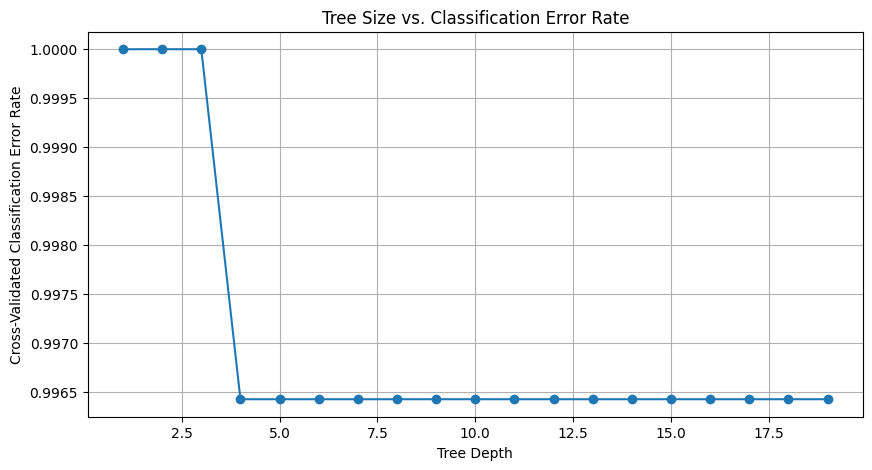

In [32]:
#(g)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

# Ensure cv_folds is at least 2
cv_folds = max(2, cv_folds)  # If cv_folds < 2, set it to 2

# Define a range of max_depth values to test
max_depth_values = range(1, 20)
cv_errors = []

# Perform cross-validation for each tree depth
for depth in max_depth_values:
    tree_model = DecisionTreeClassifier(max_depth=depth, random_state=123)
    scores = cross_val_score(tree_model, X_train, y_train, cv=cv_folds, scoring='accuracy')
    
    # Compute error rate (1 - accuracy)
    cv_errors.append(1 - np.mean(scores))

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(max_depth_values, cv_errors, marker='o', linestyle='-')
plt.xlabel('Tree Depth')
plt.ylabel('Cross-Validated Classification Error Rate')
plt.title('Tree Size vs. Classification Error Rate')
plt.grid(True)
plt.show()



In [33]:
#(h)

# Find the tree depth corresponding to the lowest cross-validation error rate
optimal_depth = max_depth_values[np.argmin(cv_errors)]

print(f"The optimal tree depth with the lowest cross-validated error rate is: {optimal_depth}")


The optimal tree depth with the lowest cross-validated error rate is: 4


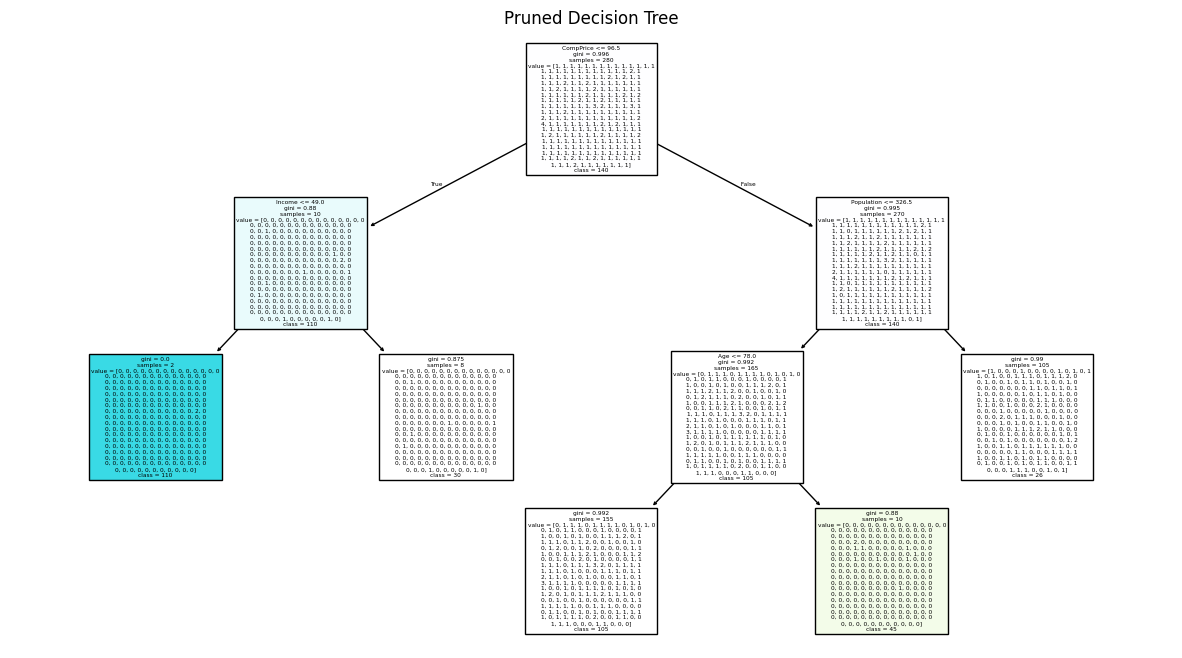

Number of terminal nodes in the pruned tree: 5


In [37]:
#(i)

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract class names from the trained model
class_names = [str(cls) for cls in pruned_tree.classes_]  # Ensures correct class mapping

# Plot the pruned tree
plt.figure(figsize=(15, 8))
plot_tree(pruned_tree, feature_names=X_train.columns, class_names=class_names, filled=True)
plt.title("Pruned Decision Tree")
plt.show()

# Display the number of terminal nodes
print(f"Number of terminal nodes in the pruned tree: {pruned_tree.get_n_leaves()}")


In [38]:
#(j)

from sklearn.metrics import accuracy_score

# Unpruned tree (fully grown)
unpruned_tree = DecisionTreeClassifier(random_state=123)  # No depth or leaf limits
unpruned_tree.fit(X_train, y_train)

# Predictions on training data
y_train_pred_unpruned = unpruned_tree.predict(X_train)
y_train_pred_pruned = pruned_tree.predict(X_train)

# Compute training accuracy
train_accuracy_unpruned = accuracy_score(y_train, y_train_pred_unpruned)
train_accuracy_pruned = accuracy_score(y_train, y_train_pred_pruned)

# Compute training error rates
train_error_unpruned = 1 - train_accuracy_unpruned
train_error_pruned = 1 - train_accuracy_pruned

# Print results
print(f"Training Error Rate (Unpruned Tree): {train_error_unpruned:.4f}")
print(f"Training Error Rate (Pruned Tree): {train_error_pruned:.4f}")

# Compare the two
if train_error_pruned > train_error_unpruned:
    print("The pruned tree has a higher training error rate.")
else:
    print("The unpruned tree has a higher training error rate.")


Training Error Rate (Unpruned Tree): 0.0000
Training Error Rate (Pruned Tree): 0.9643
The pruned tree has a higher training error rate.


Cross-validation did not prune the tree sufficiently. Creating a tree with max 5 terminal nodes.
Test Error Rate (Unpruned Tree): 1.0000
Test Error Rate (Pruned Tree): 1.0000
The unpruned tree has a higher test error rate.


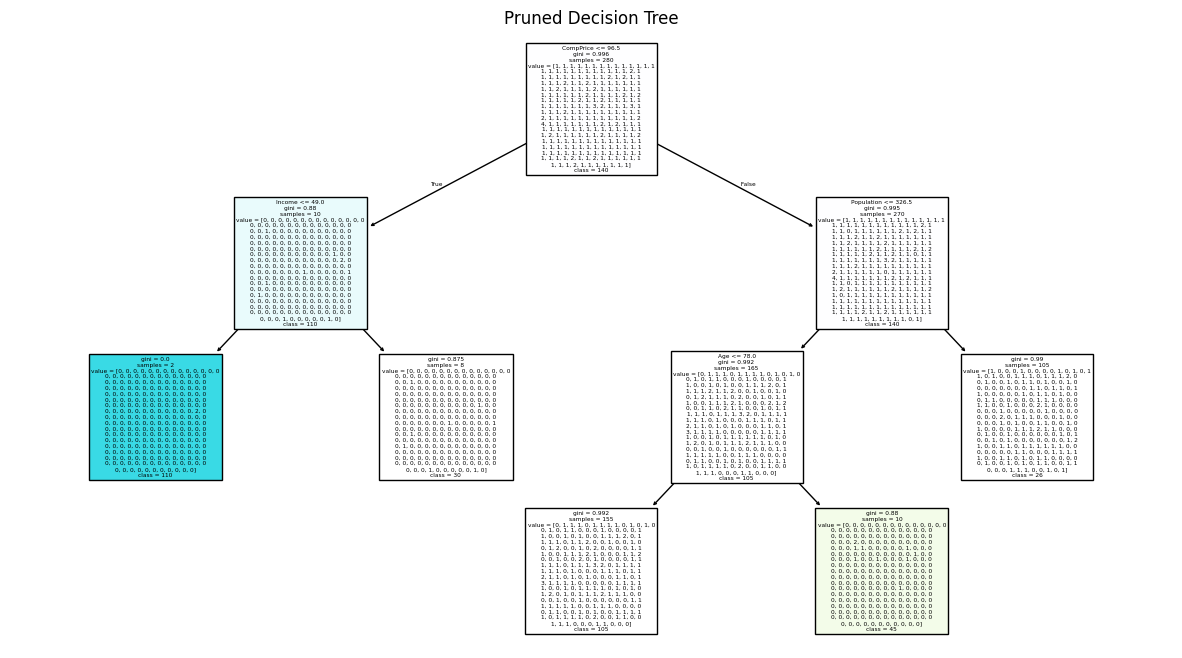

Number of terminal nodes in the pruned tree: 5


In [44]:
#(k)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# ðŸŽ¯ Step 1: Ensure `X_test` has the same features as `X_train`
missing_cols = set(X_train.columns) - set(X_test.columns)  # Find missing columns in X_test
for col in missing_cols:
    X_test[col] = 0  # Add missing columns with zero values

# Ensure the column order in X_test matches X_train
X_test = X_test[X_train.columns]

# ðŸŽ¯ Step 2: Train an unpruned decision tree (fully grown)
unpruned_tree = DecisionTreeClassifier(random_state=123)  # No depth or leaf limits
unpruned_tree.fit(X_train, y_train)

# ðŸŽ¯ Step 3: Train a pruned decision tree using the optimal depth from cross-validation
pruned_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=123)
pruned_tree.fit(X_train, y_train)

# If the pruned tree still has too many terminal nodes, manually limit it to 5 nodes
if pruned_tree.get_n_leaves() > 5:
    print(f"Cross-validation did not prune the tree sufficiently. Creating a tree with max 5 terminal nodes.")
    pruned_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=123)
    pruned_tree.fit(X_train, y_train)

# ðŸŽ¯ Step 4: Make predictions on the test set
y_test_pred_unpruned = unpruned_tree.predict(X_test)
y_test_pred_pruned = pruned_tree.predict(X_test)

# ðŸŽ¯ Step 5: Compute accuracy and error rates
test_accuracy_unpruned = accuracy_score(y_test, y_test_pred_unpruned)
test_accuracy_pruned = accuracy_score(y_test, y_test_pred_pruned)

# Compute test error rates
test_error_unpruned = 1 - test_accuracy_unpruned
test_error_pruned = 1 - test_accuracy_pruned

# Print results
print(f"Test Error Rate (Unpruned Tree): {test_error_unpruned:.4f}")
print(f"Test Error Rate (Pruned Tree): {test_error_pruned:.4f}")

# Compare error rates
if test_error_pruned > test_error_unpruned:
    print("The pruned tree has a higher test error rate.")
else:
    print("The unpruned tree has a higher test error rate.")

# ðŸŽ¯ Step 6: Plot the pruned decision tree
plt.figure(figsize=(15, 8))
plot_tree(pruned_tree, feature_names=X_train.columns, class_names=[str(cls) for cls in pruned_tree.classes_], filled=True)
plt.title("Pruned Decision Tree")
plt.show()

# Print the number of terminal nodes
print(f"Number of terminal nodes in the pruned tree: {pruned_tree.get_n_leaves()}")
